# Akash Ugale

## Bharat Intern Machine learning Internship

### Project 1:- House Price Prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("G:/Projects/Bharat Intern Projects/House price prediction/HousePricePrediction.csv")
df.head(5)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [3]:
df.shape

(2919, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [5]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print(obj)
print("Categorical variables:",len(object_cols))

Id              False
MSSubClass      False
MSZoning         True
LotArea         False
LotConfig        True
BldgType         True
OverallCond     False
YearBuilt       False
YearRemodAdd    False
Exterior1st      True
BsmtFinSF2      False
TotalBsmtSF     False
SalePrice       False
dtype: bool
Categorical variables: 4


In [6]:
int_ = (df.dtypes == 'int64')
num_cols = list(int_[int_].index)
print(int_)
print("Integer variables:",len(num_cols))

Id               True
MSSubClass       True
MSZoning        False
LotArea          True
LotConfig       False
BldgType        False
OverallCond      True
YearBuilt        True
YearRemodAdd     True
Exterior1st     False
BsmtFinSF2      False
TotalBsmtSF     False
SalePrice       False
dtype: bool
Integer variables: 6


In [7]:
flo = (df.dtypes == 'float')
flo_cols = list(flo[flo].index)
print(flo)
print("Float variables:",len(flo_cols))

Id              False
MSSubClass      False
MSZoning        False
LotArea         False
LotConfig       False
BldgType        False
OverallCond     False
YearBuilt       False
YearRemodAdd    False
Exterior1st     False
BsmtFinSF2       True
TotalBsmtSF      True
SalePrice        True
dtype: bool
Float variables: 3


<AxesSubplot:>

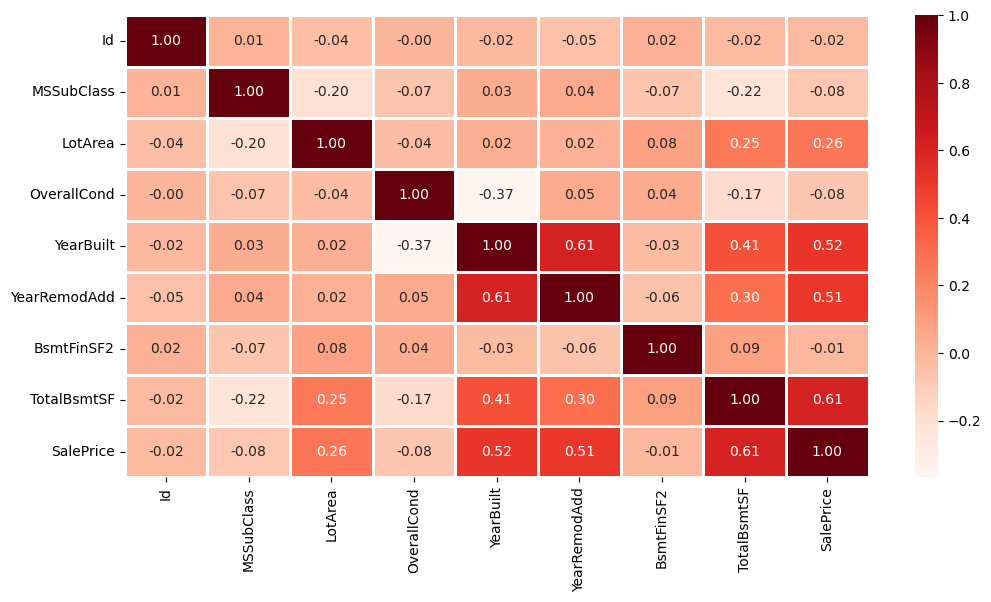

In [8]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),cmap='Reds',fmt='.2f',linewidths=2,annot=True)

Text(0.5, 1.0, 'Number of Unique Values in Each Column')

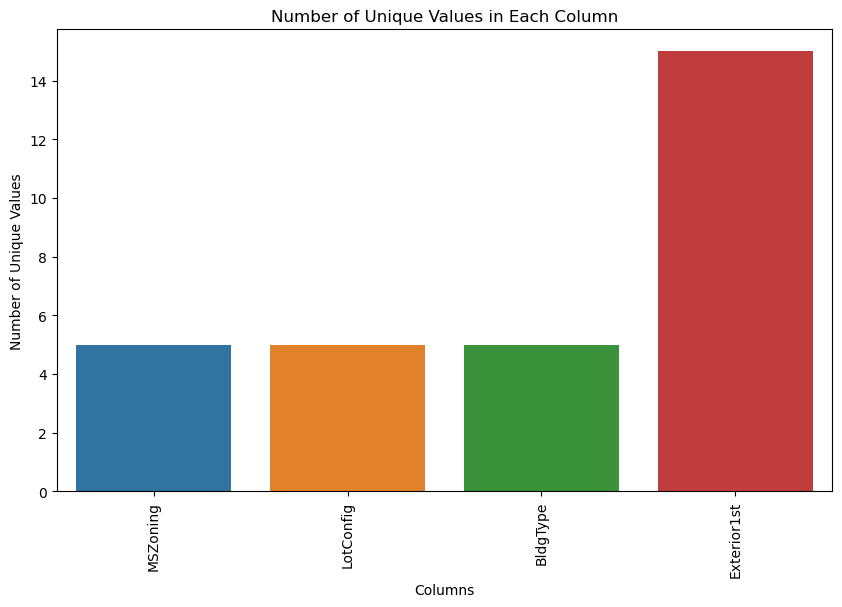

In [9]:
unique_counts =df.select_dtypes(include=['object']).nunique()

plt.figure(figsize=(10, 6))
sns.barplot(x=unique_counts.index, y=unique_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.title('Number of Unique Values in Each Column')

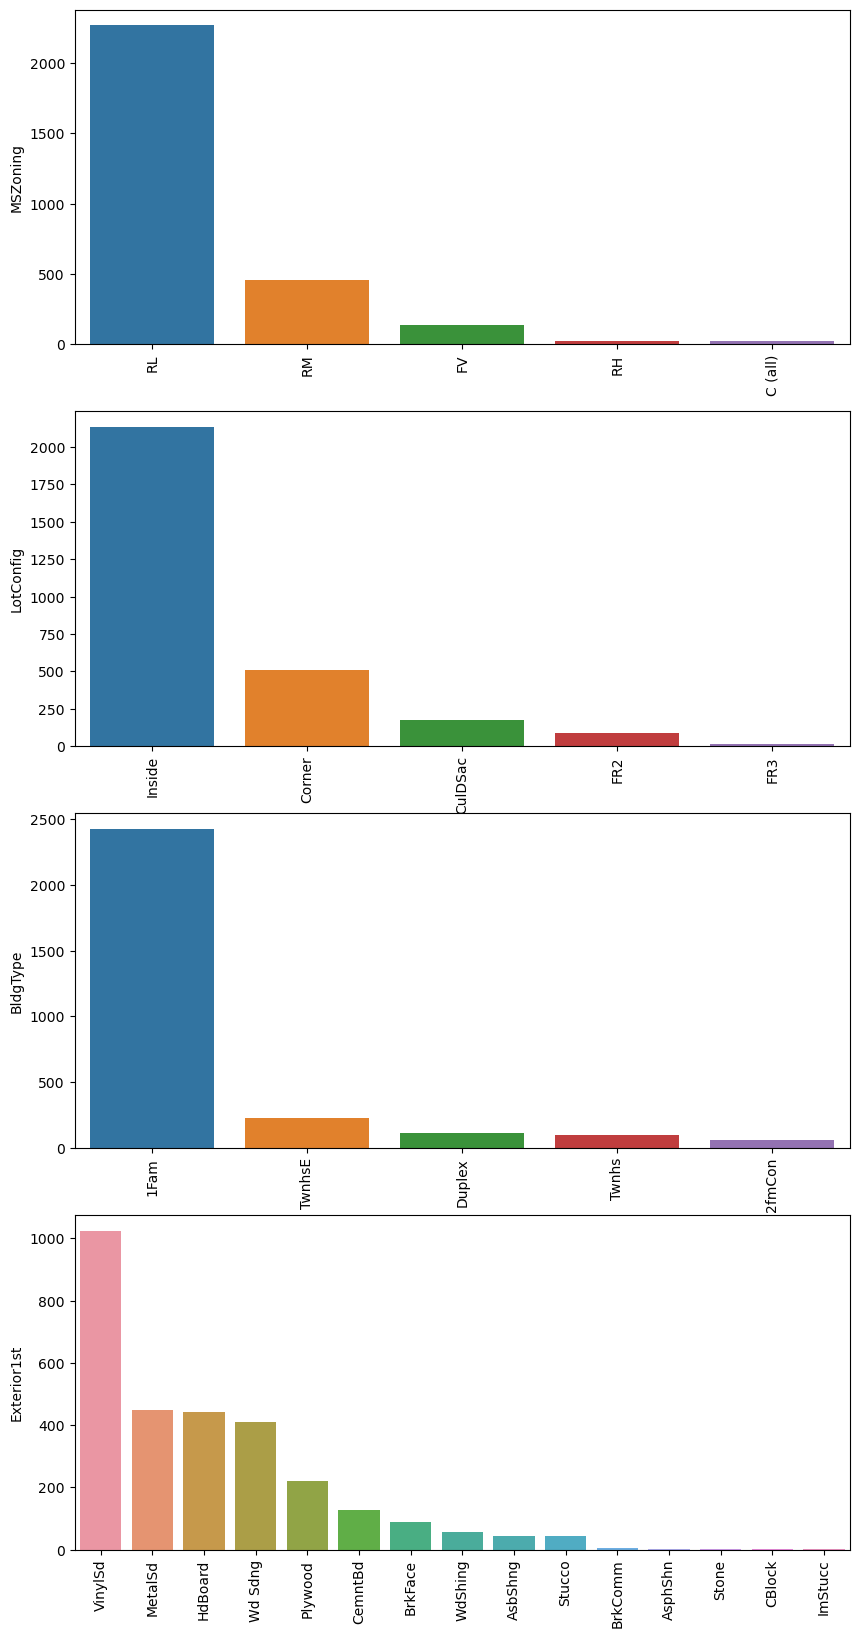

In [10]:
plt.figure(figsize=(10,20))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1
 
for col in object_cols:
    y = df[col].value_counts()
    plt.subplot(4, 1, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

In [11]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [12]:
df.drop(['Id'],axis=1,inplace=True)

df['SalePrice'] = df['SalePrice'].fillna(df['SalePrice'].mean())

new_df = df.dropna()
new_df.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [13]:
from sklearn.preprocessing import OneHotEncoder
 
s = (new_df.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [14]:
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_df[object_cols]))
OH_cols.index = new_df.index
OH_cols.columns = OH_encoder.get_feature_names()
df_final = new_df.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)
df_final.columns

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Index(['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice', 'x0_C (all)', 'x0_FV',
       'x0_RH', 'x0_RL', 'x0_RM', 'x1_Corner', 'x1_CulDSac', 'x1_FR2',
       'x1_FR3', 'x1_Inside', 'x2_1Fam', 'x2_2fmCon', 'x2_Duplex', 'x2_Twnhs',
       'x2_TwnhsE', 'x3_AsbShng', 'x3_AsphShn', 'x3_BrkComm', 'x3_BrkFace',
       'x3_CBlock', 'x3_CemntBd', 'x3_HdBoard', 'x3_ImStucc', 'x3_MetalSd',
       'x3_Plywood', 'x3_Stone', 'x3_Stucco', 'x3_VinylSd', 'x3_Wd Sdng',
       'x3_WdShing'],
      dtype='object')

In [15]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
 
X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [16]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.metrics import mean_absolute_percentage_error

In [17]:
# SVM – Support vector Machine

from sklearn import svm
from sklearn.svm import SVC

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error (MSE):", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error (MAE):", mae)

mape = mean_absolute_percentage_error(Y_test, Y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

r_squared = r2_score(Y_test, Y_pred)
print("R-squared (coefficient of determination):", r_squared)

p = X_train.shape[1]
n = X_train.shape[0] 
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adjusted_r_squared)

explained_variance = explained_variance_score(Y_test, Y_pred)
print("Explained Variance Score:", explained_variance)

Mean Squared Error (MSE): 2704093823.1798863
Root Mean Squared Error (RMSE): 52000.90213813493
Mean Absolute Error (MAE): 28848.681203988202
Mean Absolute Percentage Error (MAPE): 0.1870512931870423
R-squared (coefficient of determination): 1.6224524168606536e-06
Adjusted R-squared: -0.016141457813403814
Explained Variance Score: 1.8022896757230455e-06


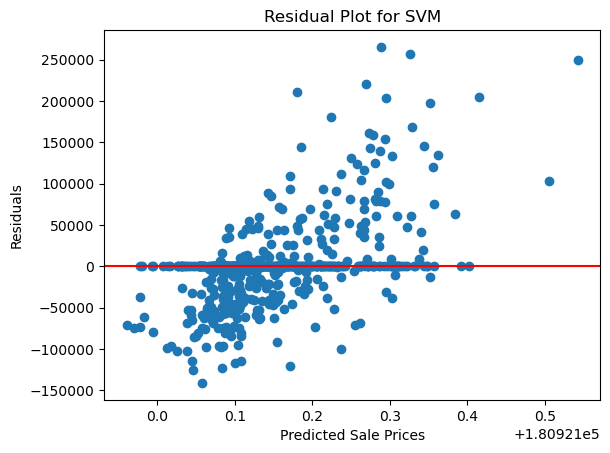

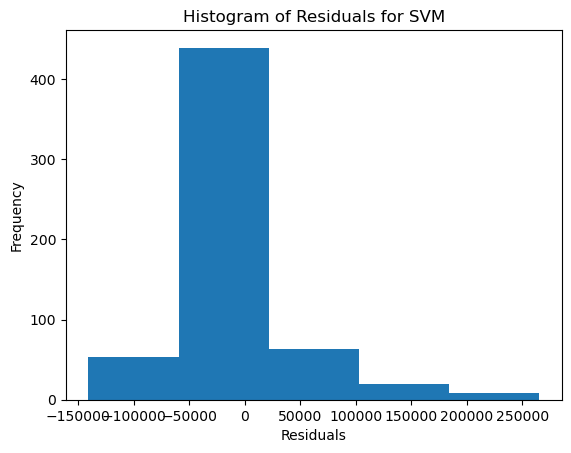

In [18]:
residuals =Y_test- Y_pred

plt.scatter(Y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Predicted Sale Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot for SVM")
plt.show()

plt.hist(residuals, bins=5)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals for SVM")
plt.show()

In [19]:
# Random Forest Regression

from sklearn.ensemble import RandomForestRegressor
 
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error (MSE):", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error (MAE):", mae)

mape = mean_absolute_percentage_error(Y_test, Y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

r_squared = r2_score(Y_test, Y_pred)
print("R-squared (coefficient of determination):", r_squared)

p = X_train.shape[1]
n = X_train.shape[0] 
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adjusted_r_squared)

explained_variance = explained_variance_score(Y_test, Y_pred)
print("Explained Variance Score:", explained_variance)

Mean Squared Error (MSE): 1973597738.2993407
Root Mean Squared Error (RMSE): 44425.19260846644
Mean Absolute Error (MAE): 31925.221370689316
Mean Absolute Percentage Error (MAPE): 0.19369599056932832
R-squared (coefficient of determination): 0.2701456882475821
Adjusted R-squared: 0.2583635723946853
Explained Variance Score: 0.2701626805448637


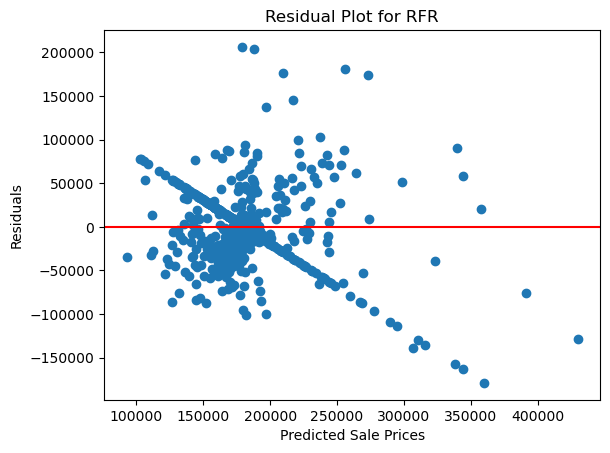

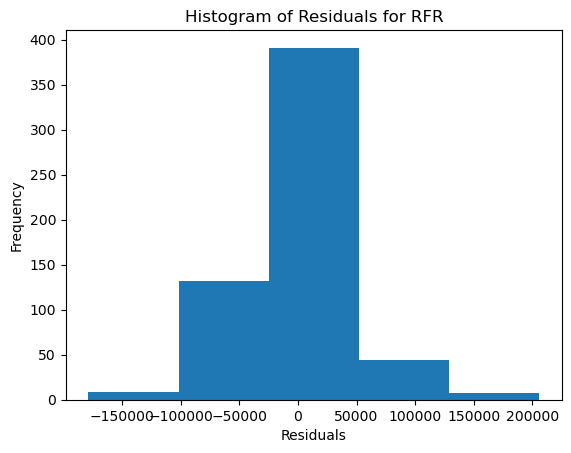

In [20]:
residuals =Y_test- Y_pred

plt.scatter(Y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Predicted Sale Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot for RFR")
plt.show()

plt.hist(residuals, bins=5)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals for RFR")
plt.show()

In [22]:
# Linear Regression

from sklearn.linear_model import LinearRegression
 
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error (MSE):", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error (MAE):", mae)

mape = mean_absolute_percentage_error(Y_test, Y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

r_squared = r2_score(Y_test, Y_pred)
print("R-squared (coefficient of determination):", r_squared)

p = X_train.shape[1]
n = X_train.shape[0] 
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adjusted_r_squared)

explained_variance = explained_variance_score(Y_test, Y_pred)
print("Explained Variance Score:", explained_variance)

Mean Squared Error (MSE): 1692380766.4526894
Root Mean Squared Error (RMSE): 41138.55571665939
Mean Absolute Error (MAE): 30829.936664322177
Mean Absolute Percentage Error (MAPE): 0.1874168384160009
R-squared (coefficient of determination): 0.37414227045743986
Adjusted R-squared: 0.3640389825023461
Explained Variance Score: 0.3741447279928155


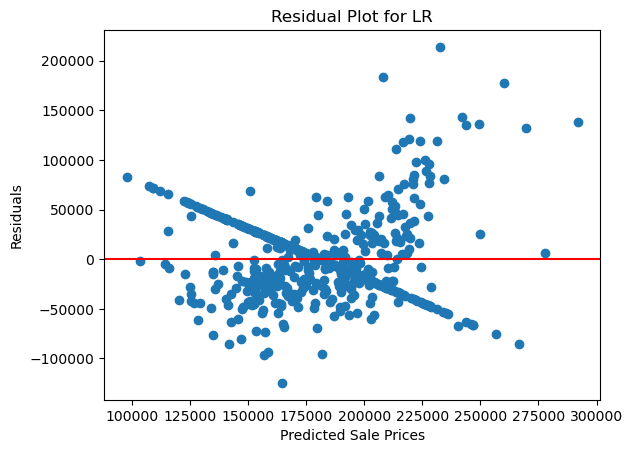

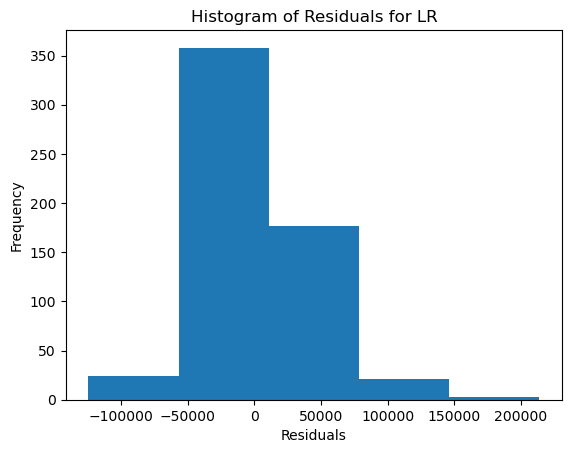

In [23]:
residuals =Y_test- Y_pred

plt.scatter(Y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Predicted Sale Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot for LR")
plt.show()

plt.hist(residuals, bins=5)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals for LR")
plt.show()

In [24]:
# Ridge Regression

from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, Y_train)
Y_pred = ridge_model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error (MSE):", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error (MAE):", mae)

mape = mean_absolute_percentage_error(Y_test, Y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

r_squared = r2_score(Y_test, Y_pred)
print("R-squared (coefficient of determination):", r_squared)

p = X_train.shape[1]
n = X_train.shape[0] 
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adjusted_r_squared)

explained_variance = explained_variance_score(Y_test, Y_pred)
print("Explained Variance Score:", explained_variance)

Mean Squared Error (MSE): 1688065963.1703465
Root Mean Squared Error (RMSE): 41086.07991972885
Mean Absolute Error (MAE): 30790.592772716795
Mean Absolute Percentage Error (MAPE): 0.18720223297663996
R-squared (coefficient of determination): 0.3757379237756765
Adjusted R-squared: 0.365660394621968
Explained Variance Score: 0.3757424847342964


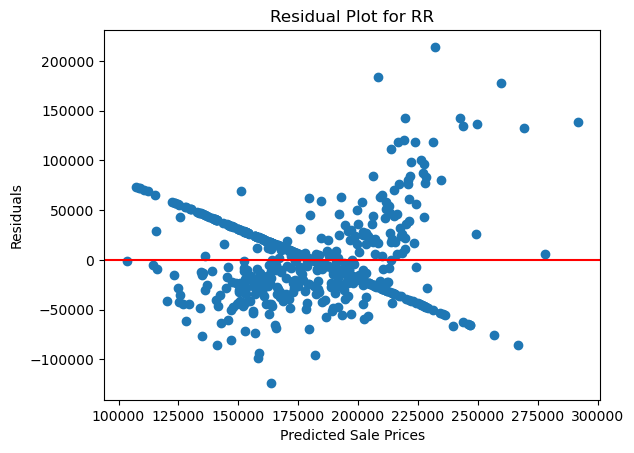

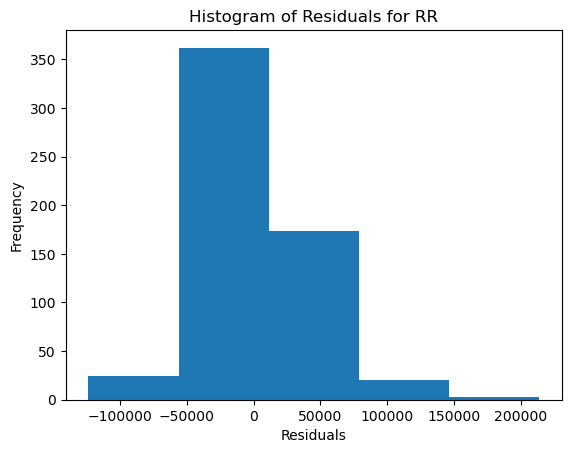

In [25]:
residuals =Y_test- Y_pred

plt.scatter(Y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Predicted Sale Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot for RR")
plt.show()

plt.hist(residuals, bins=5)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals for RR")
plt.show()

In [26]:
# Lasso Regression

from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, Y_train)
y_pred = lasso_model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error (MSE):", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error (MAE):", mae)

mape = mean_absolute_percentage_error(Y_test, Y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

r_squared = r2_score(Y_test, Y_pred)
print("R-squared (coefficient of determination):", r_squared)

p = X_train.shape[1]
n = X_train.shape[0] 
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adjusted_r_squared)

explained_variance = explained_variance_score(Y_test, Y_pred)
print("Explained Variance Score:", explained_variance)

Mean Squared Error (MSE): 1688065963.1703465
Root Mean Squared Error (RMSE): 41086.07991972885
Mean Absolute Error (MAE): 30790.592772716795
Mean Absolute Percentage Error (MAPE): 0.18720223297663996
R-squared (coefficient of determination): 0.3757379237756765
Adjusted R-squared: 0.365660394621968
Explained Variance Score: 0.3757424847342964


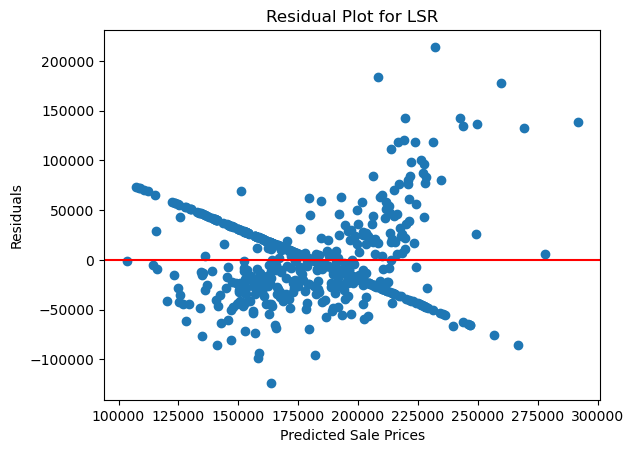

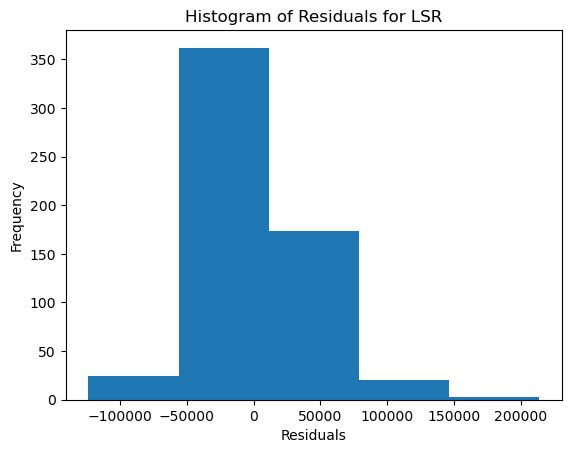

In [27]:
residuals =Y_test- Y_pred

plt.scatter(Y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Predicted Sale Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot for LSR")
plt.show()

plt.hist(residuals, bins=5)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals for LSR")
plt.show()

In [28]:
# Elastic Net regression

from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.5, l1_ratio=0.5)
elastic_net.fit(X_train, Y_train)
y_pred = elastic_net.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error (MSE):", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error (MAE):", mae)

mape = mean_absolute_percentage_error(Y_test, Y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

r_squared = r2_score(Y_test, Y_pred)
print("R-squared (coefficient of determination):", r_squared)

p = X_train.shape[1]
n = X_train.shape[0] 
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adjusted_r_squared)

explained_variance = explained_variance_score(Y_test, Y_pred)
print("Explained Variance Score:", explained_variance)

Mean Squared Error (MSE): 1688065963.1703465
Root Mean Squared Error (RMSE): 41086.07991972885
Mean Absolute Error (MAE): 30790.592772716795
Mean Absolute Percentage Error (MAPE): 0.18720223297663996
R-squared (coefficient of determination): 0.3757379237756765
Adjusted R-squared: 0.365660394621968
Explained Variance Score: 0.3757424847342964


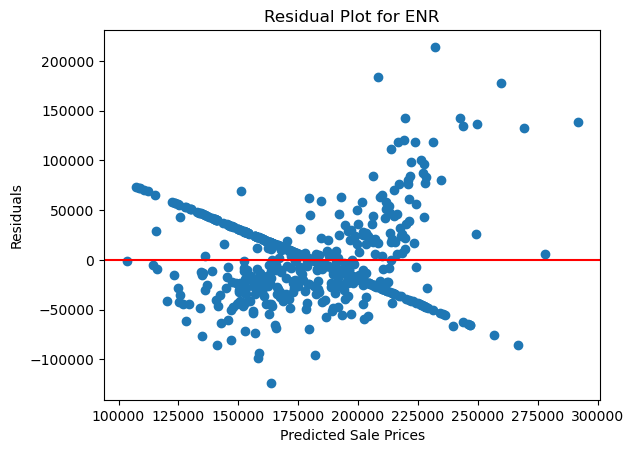

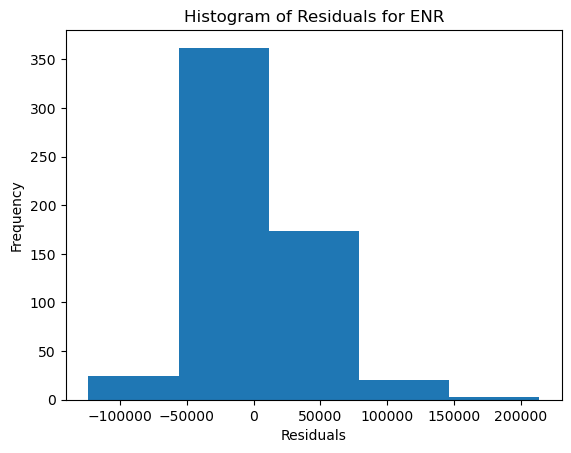

In [29]:
residuals =Y_test- Y_pred

plt.scatter(Y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Predicted Sale Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot for ENR")
plt.show()

plt.hist(residuals, bins=5)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals for ENR")
plt.show()

In [30]:
# Decision Tree Regression

from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, Y_train)
Y_pred = tree_model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error (MSE):", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error (MAE):", mae)

mape = mean_absolute_percentage_error(Y_test, Y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

r_squared = r2_score(Y_test, Y_pred)
print("R-squared (coefficient of determination):", r_squared)

p = X_train.shape[1]
n = X_train.shape[0] 
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adjusted_r_squared)

explained_variance = explained_variance_score(Y_test, Y_pred)
print("Explained Variance Score:", explained_variance)

Mean Squared Error (MSE): 3626456980.4647355
Root Mean Squared Error (RMSE): 60220.071242607606
Mean Absolute Error (MAE): 37731.992816638856
Mean Absolute Percentage Error (MAPE): 0.2208461669400233
R-squared (coefficient of determination): -0.3410966238021682
Adjusted R-squared: -0.36274608936965524
Explained Variance Score: -0.3410962555127173


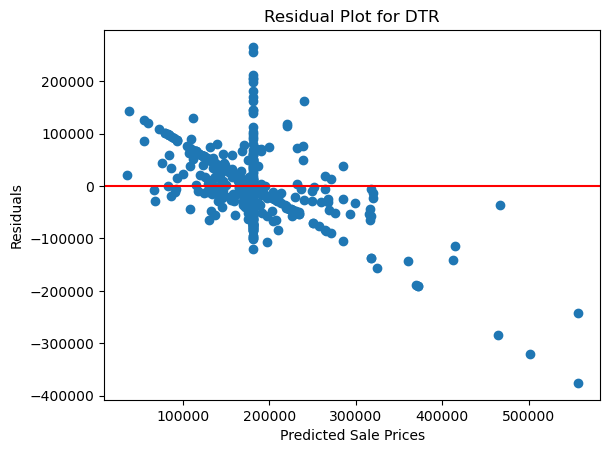

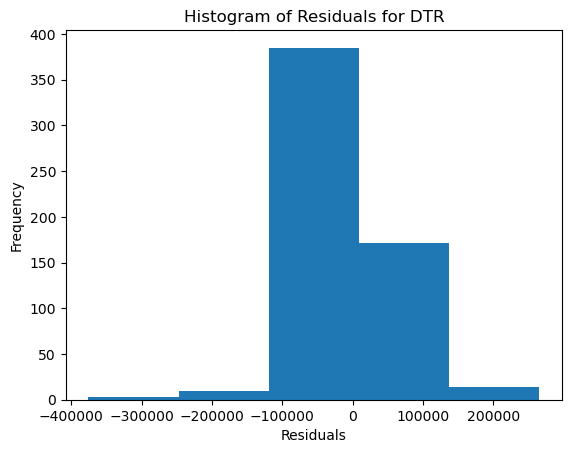

In [31]:
residuals =Y_test- Y_pred

plt.scatter(Y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Predicted Sale Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot for DTR")
plt.show()

plt.hist(residuals, bins=5)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals for DTR")
plt.show()

In [33]:
# Gradient Boosting Regression

from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train, Y_train)
Y_pred = gbr_model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error (MSE):", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error (MAE):", mae)

mape = mean_absolute_percentage_error(Y_test, Y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

r_squared = r2_score(Y_test, Y_pred)
print("R-squared (coefficient of determination):", r_squared)

p = X_train.shape[1]
n = X_train.shape[0] 
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adjusted_r_squared)

explained_variance = explained_variance_score(Y_test, Y_pred)
print("Explained Variance Score:", explained_variance)

Mean Squared Error (MSE): 1767689871.9609244
Root Mean Squared Error (RMSE): 42043.904099892105
Mean Absolute Error (MAE): 30588.578036008636
Mean Absolute Percentage Error (MAPE): 0.18769977866246182
R-squared (coefficient of determination): 0.3462922814233187
Adjusted R-squared: 0.33573940813041414
Explained Variance Score: 0.3463149215186042


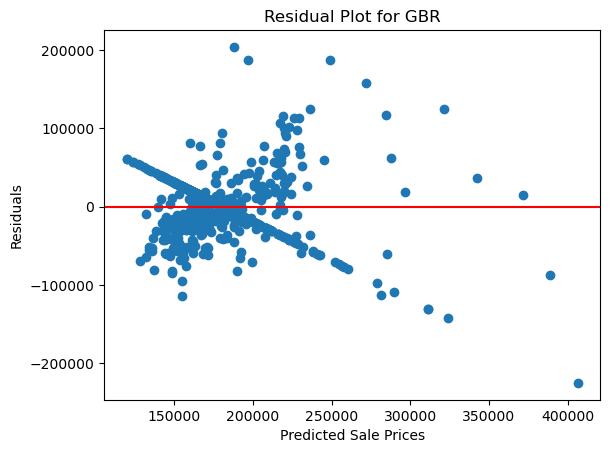

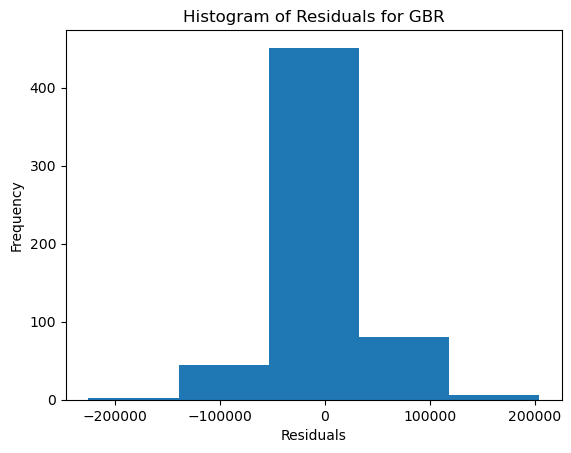

In [34]:
residuals =Y_test- Y_pred

plt.scatter(Y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Predicted Sale Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot for GBR")
plt.show()

plt.hist(residuals, bins=5)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals for GBR")
plt.show()